11490434/11490434 [==============================] - 14s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
844/844 [==============================] - 7s 7ms/step - loss: 0.3567 - accuracy: 0.8972 - val_loss: 0.1448 - val_accuracy: 0.9627
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss

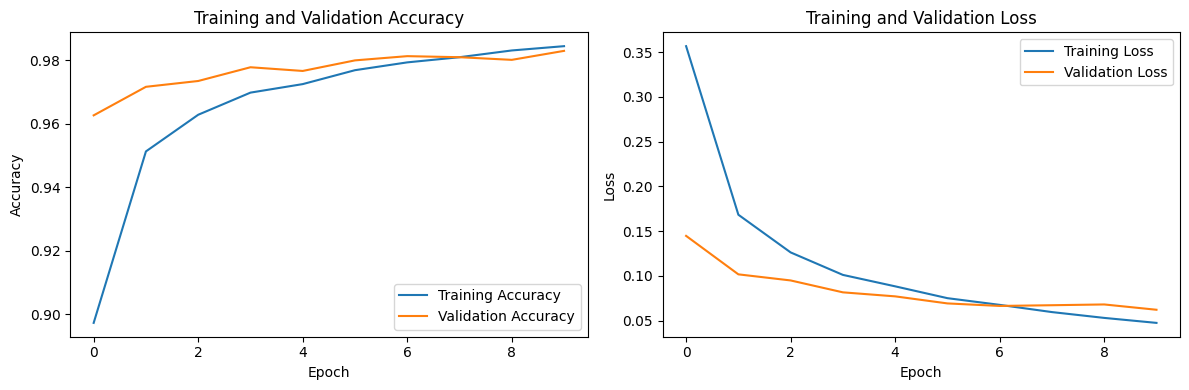

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
# If you encounter any issues with downloading, ensure you have internet access.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Flatten the images to shape (num_samples, 784) and normalize pixel values to [0, 1]
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images  = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels  = to_categorical(test_labels, num_classes=10)

# Define the initializer suitable for ReLU activation
initializer = tf.keras.initializers.HeNormal()

# Build the neural network model
model = models.Sequential()

# Hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu', input_shape=(784,),
                       kernel_initializer=initializer))

# Optionally add a Dropout layer to prevent overfitting
model.add(layers.Dropout(0.2))

# Output layer with 10 neurons and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with an appropriate optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate if needed
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary (optional)
model.summary()

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,               # You can adjust the number of epochs
                    batch_size=64,           # You can experiment with different batch sizes
                    validation_split=0.1)    # Reserve 10% of training data for validation

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
